**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;">Loading libraries and data</span>
<a id="loading"></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [88]:
!pip install xgboost
!pip install lightgbm

In [89]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [90]:
#loading data
df = pd.read_csv('Telecom_Churn.csv')

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> Undertanding the data
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Information
**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [92]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column is typed as object so we will convert it to numeric (float)

In [94]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [95]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [96]:
df.duplicated().sum()

np.int64(0)

No Duplicates

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Visualize missing values </span>
<a id = "missingvalue" ></a>

In [97]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Seems like we have no missing values

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;">  Data Manipulation </span>
<a id = "8" ></a>

Dropping customerID as it's just an identifier and doesn’t help in prediction

In [98]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [100]:
df['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
1990.50     1
7362.90     1
346.45      1
306.60      1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [101]:
print(df['TotalCharges'].isna().sum())

11


* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [102]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [103]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [104]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [105]:
df.shape

(7032, 20)

Now we have 7032 rows and 20 columns after dropping customerID column and 11 rows

In [106]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


 The TotalCharges data is right-skewed so to fill missing values in TotalCharges column, we decided to fill it with the median of TotalCharges values

In [107]:
df.fillna(df["TotalCharges"].median())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [108]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null Values present

In [109]:
df.duplicated().sum()

np.int64(22)

In [110]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [111]:
df = df.drop_duplicates()
df.duplicated().sum()  


np.int64(0)

In [112]:
df.shape

(7010, 20)

22 rows are dropped

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

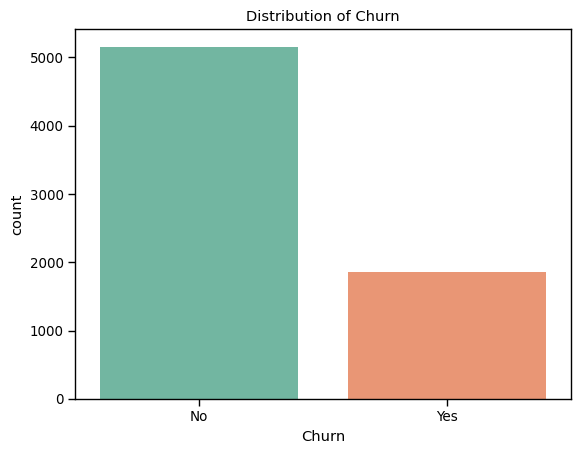

Churn
No     73.509272
Yes    26.490728
Name: proportion, dtype: float64


In [113]:
# Distribution of Churn
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Distribution of Churn")
plt.show()

print(df["Churn"].value_counts(normalize=True) * 100)

There is class imbalance

 26.6 % of customers switched to another firm



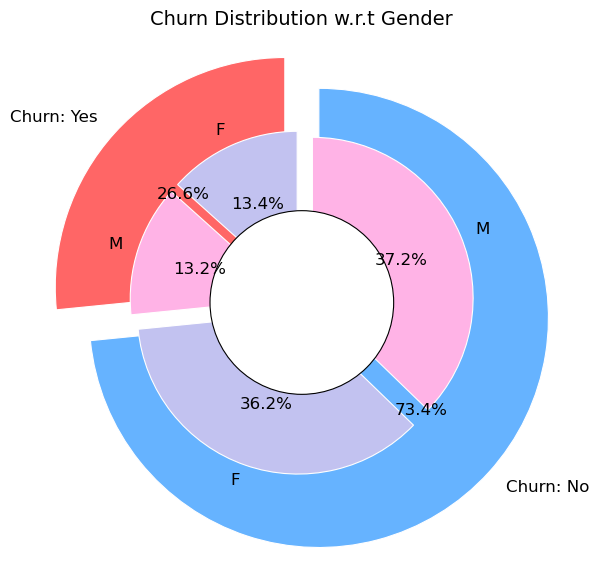

In [114]:
# Outer pie chart (Churn Distribution)
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
colors = ['#ff6666', '#66b3ff']
explode = (0.1, 0.1)  

#Gender-wise Churn distribution
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots(figsize=(7, 7))

# Outer pie 
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
       startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
# Inner pie
ax.pie(sizes_gender, labels=labels_gender, colors=colors_gender, explode=explode_gender, autopct='%1.1f%%',
       startangle=90, radius=0.7, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0, 0), 0.4, fc='white', edgecolor='black')
ax.add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender', fontsize=14)

plt.axis('equal')
plt.show()


 There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider

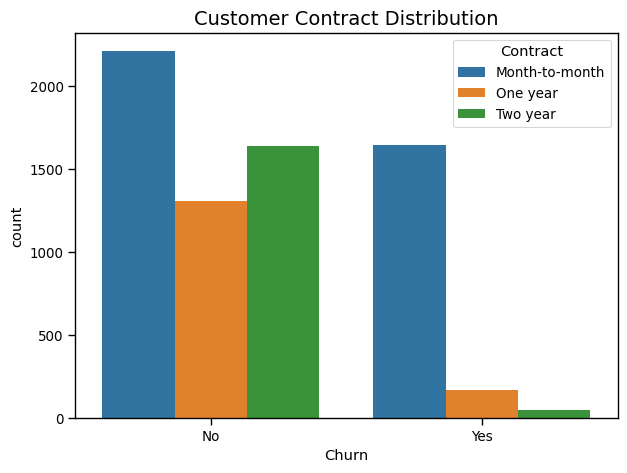

In [115]:

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Contract")

# Add title
plt.title("Customer Contract Distribution", fontsize=14)

# Show the plot
plt.show()


* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customers with One Year Contract and 3% with Two Year Contract

In [116]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

About 33.7% customers use Electronic check as Payment Method

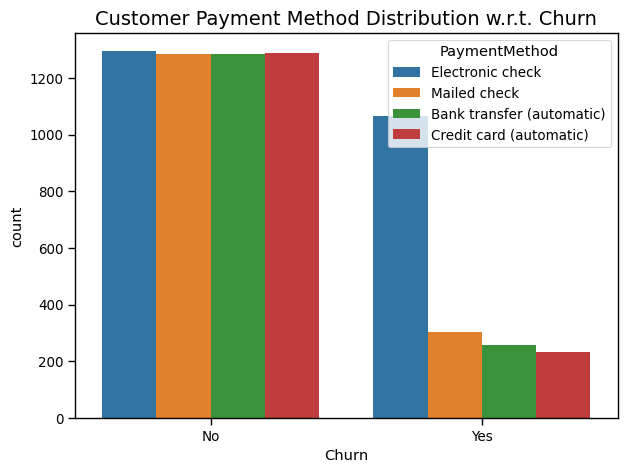

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaymentMethod")

# Add title
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize=14)

# Show the plot
plt.show()


* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [118]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

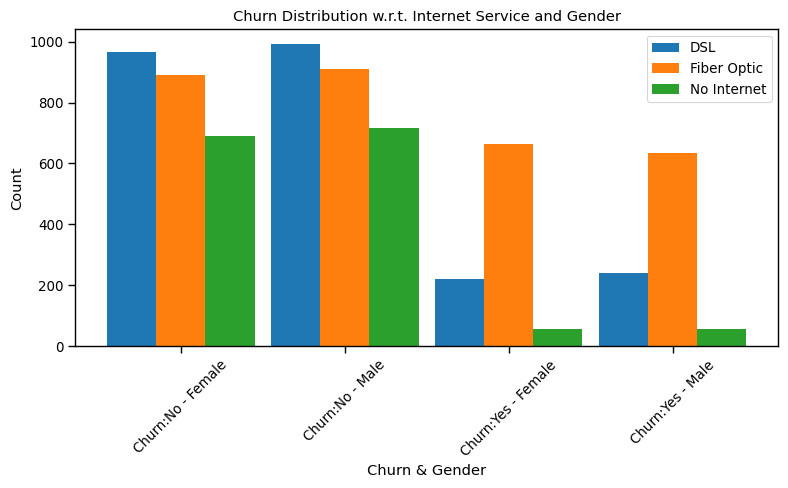

In [119]:

categories = ['Churn:No - Female', 'Churn:No - Male', 'Churn:Yes - Female', 'Churn:Yes - Male']
dsl_values = [965, 992, 219, 240]
fiber_values = [889, 910, 664, 633]
no_internet_values = [690, 717, 56, 57]

x = np.arange(len(categories))
bar_width = 0.3

plt.figure(figsize=(8, 5))

plt.bar(x - bar_width, dsl_values, width=bar_width, label='DSL')
plt.bar(x, fiber_values, width=bar_width, label='Fiber Optic')
plt.bar(x + bar_width, no_internet_values, width=bar_width, label='No Internet')

plt.xticks(x, categories, rotation=45)
plt.xlabel("Churn & Gender")
plt.ylabel("Count")
plt.title("Churn Distribution w.r.t. Internet Service and Gender")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

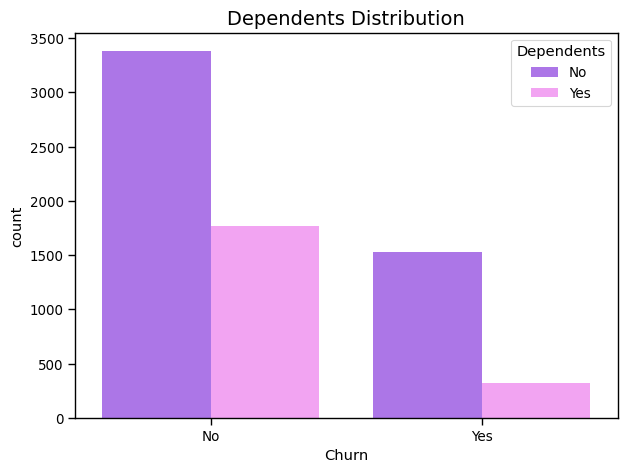

In [120]:

# Define color palette for "Dependents" categories
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Dependents", palette=color_map)

# Add title
plt.title("Dependents Distribution", fontsize=14)

# Show the plot
plt.show()


* Customers without dependents are more likely to churn

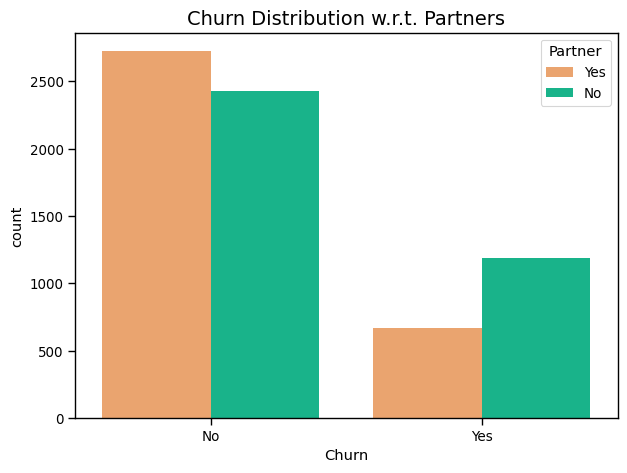

In [121]:


# Define color palette for "Partner" categories
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Partner", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Partners", fontsize=14)

# Show the plot
plt.show()


* Customers that doesn't have partners are more likely to churn

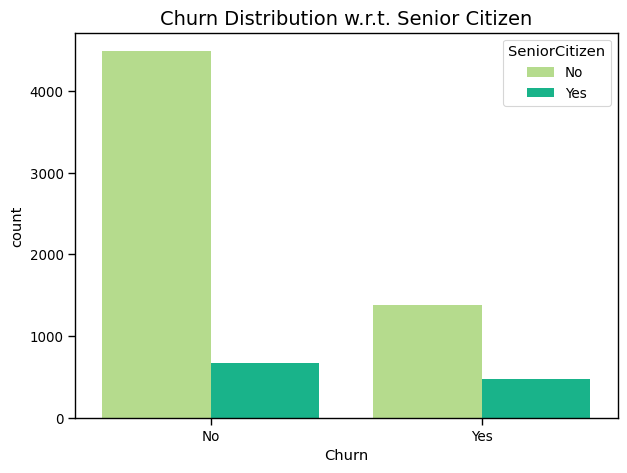

In [122]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
# Define color palette for "SeniorCitizen" categories
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="SeniorCitizen", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Senior Citizen", fontsize=14)

# Show the plot
plt.show()


* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

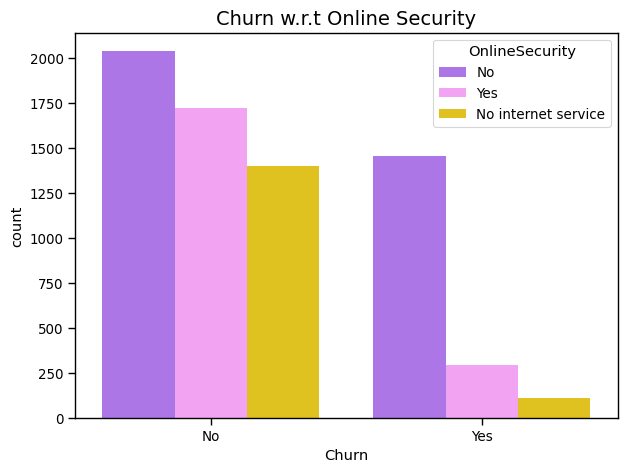

In [123]:
# Define color palette including "No internet service"
color_map = {"Yes": "#FF97FF", "No": "#AB63FA", "No internet service": "#FFD700"}  # Added missing key

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="OnlineSecurity", palette=color_map)

# Add title
plt.title("Churn w.r.t Online Security", fontsize=14)

# Show the plot
plt.show()


* Most customers churn in the absence of online security, 

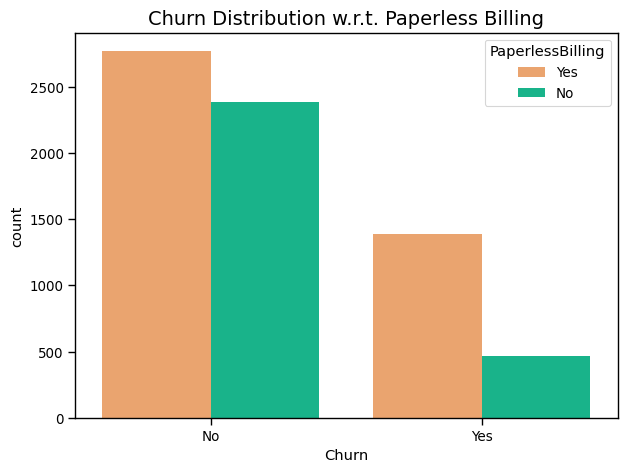

In [124]:

# Define color palette for "PaperlessBilling" categories
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaperlessBilling", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize=14)

# Show the plot
plt.show()


* Customers with Paperless Billing are most likely to churn.

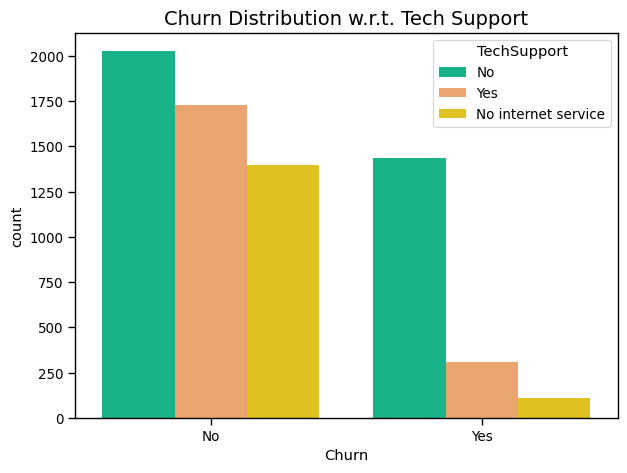

In [125]:

# Define color palette including "No internet service"
color_map = {"Yes": "#FFA15A", "No": "#00CC96", "No internet service": "#FFD700"}  # Added missing category

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="TechSupport", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Tech Support", fontsize=14)

# Show the plot
plt.show()


* Customers with no TechSupport are most likely to migrate to another service provider.

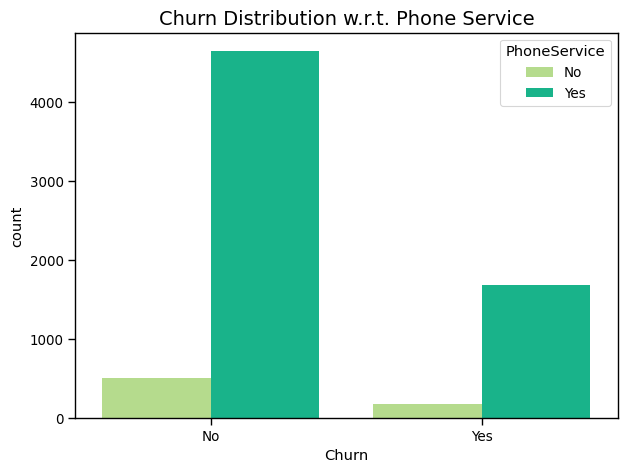

In [126]:

# Define color palette for "PhoneService" categories
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PhoneService", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Phone Service", fontsize=14)

# Show the plot
plt.show()


* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

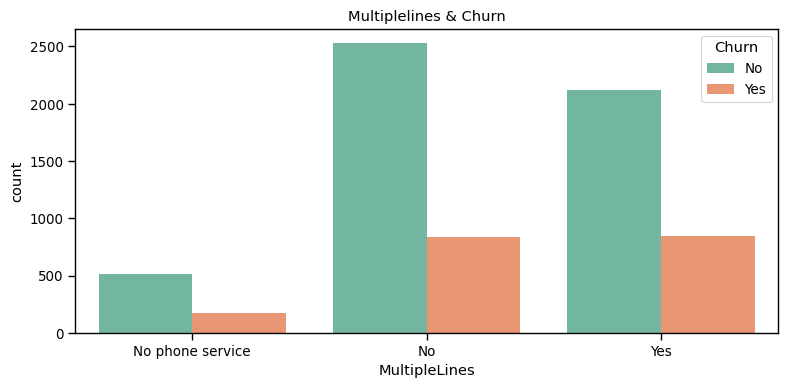

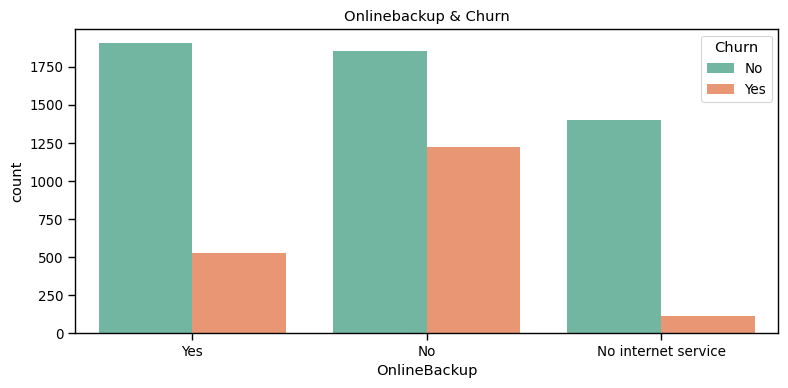

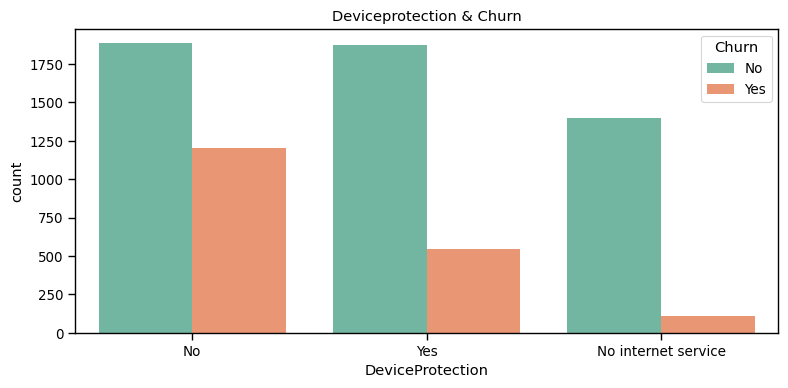

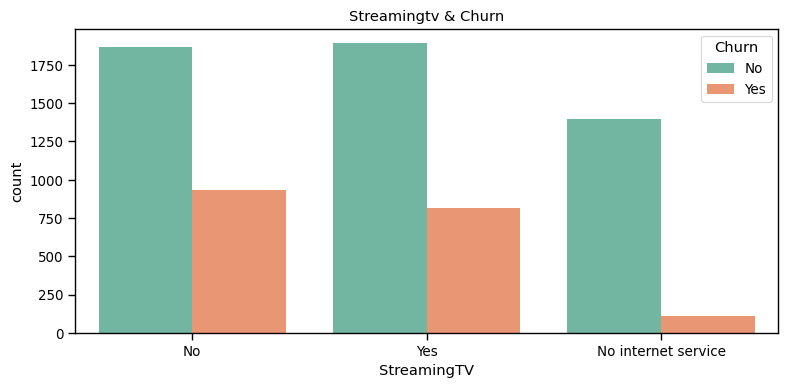

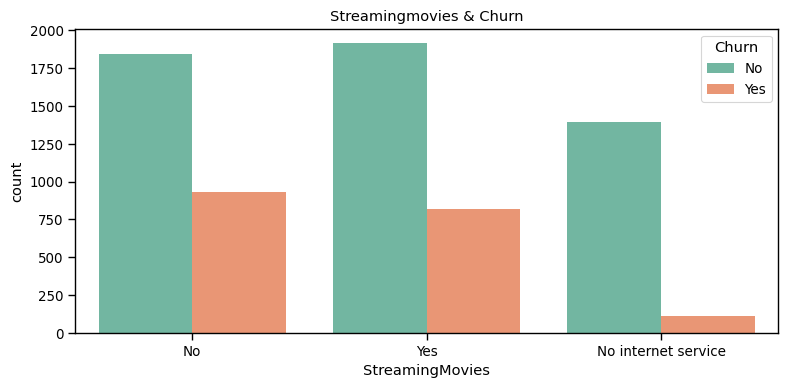

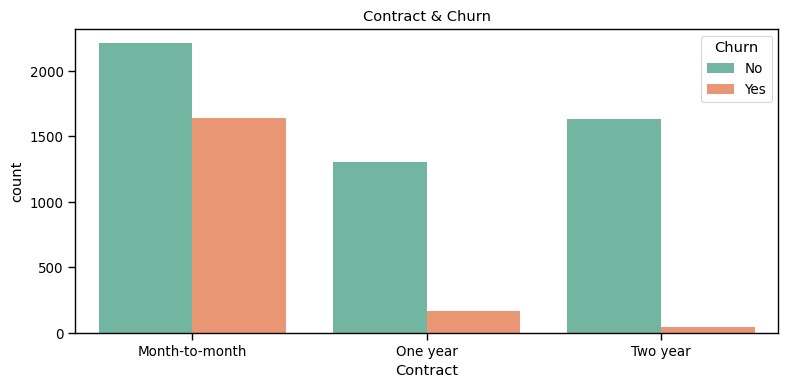

In [127]:
cols=['MultipleLines','OnlineBackup', 'DeviceProtection',  'StreamingTV', 'StreamingMovies', 'Contract']


for col in cols:

        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
        plt.title(f"{col.capitalize()} & Churn")
        plt.tight_layout()
        plt.show()

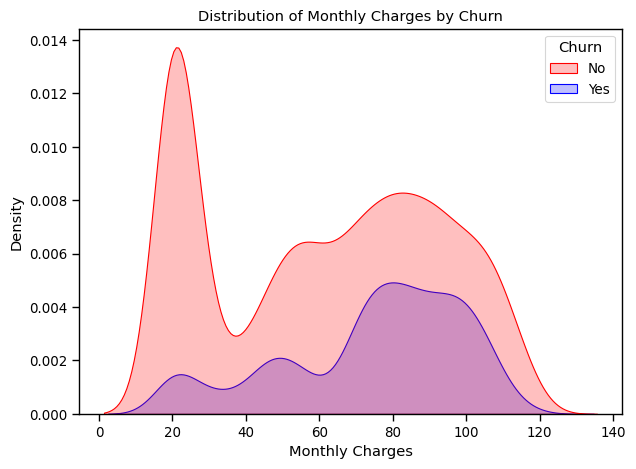

In [128]:
# Set Seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True, palette={"No": "Red", "Yes": "Blue"})

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges by Churn")

# Show the plot
plt.show()


* Customers with higher Monthly Charges are also more likely to churn

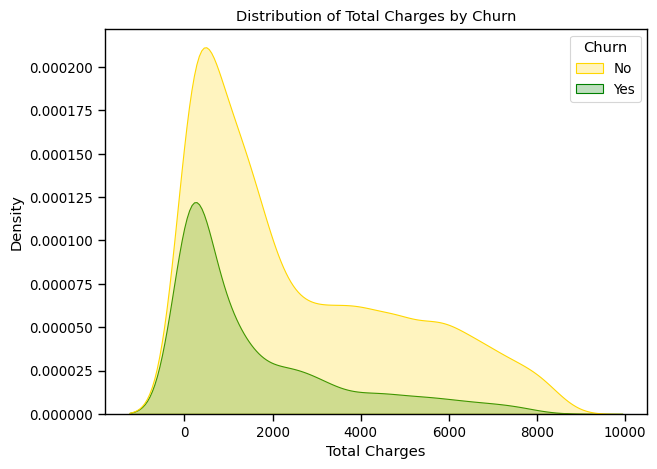

In [129]:

# Set Seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True, palette={"No": "Gold", "Yes": "Green"})

# Add labels and title
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Distribution of Total Charges by Churn")

# Show the plot
plt.show()


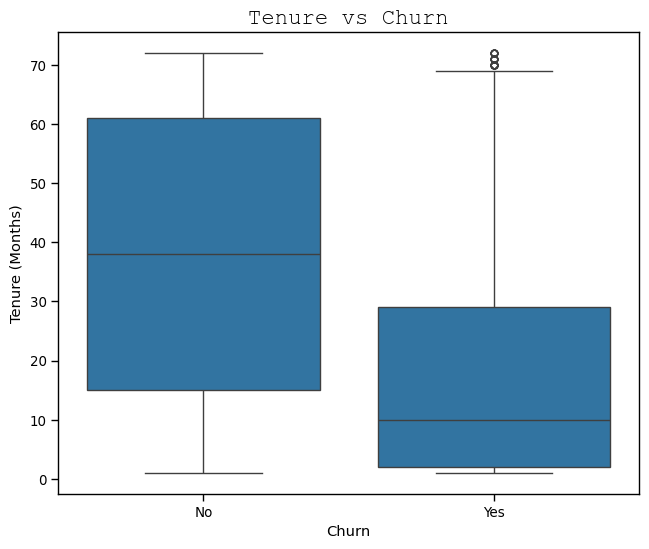

In [130]:
# Create the box plot
plt.figure(figsize=(7.5, 6))
sns.boxplot(data=df, x="Churn", y="tenure")

# Add title and labels
plt.title("Tenure vs Churn", fontsize=16, fontfamily="Courier New")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")

# Show the plot
plt.show()


* New customers are more likely to churn

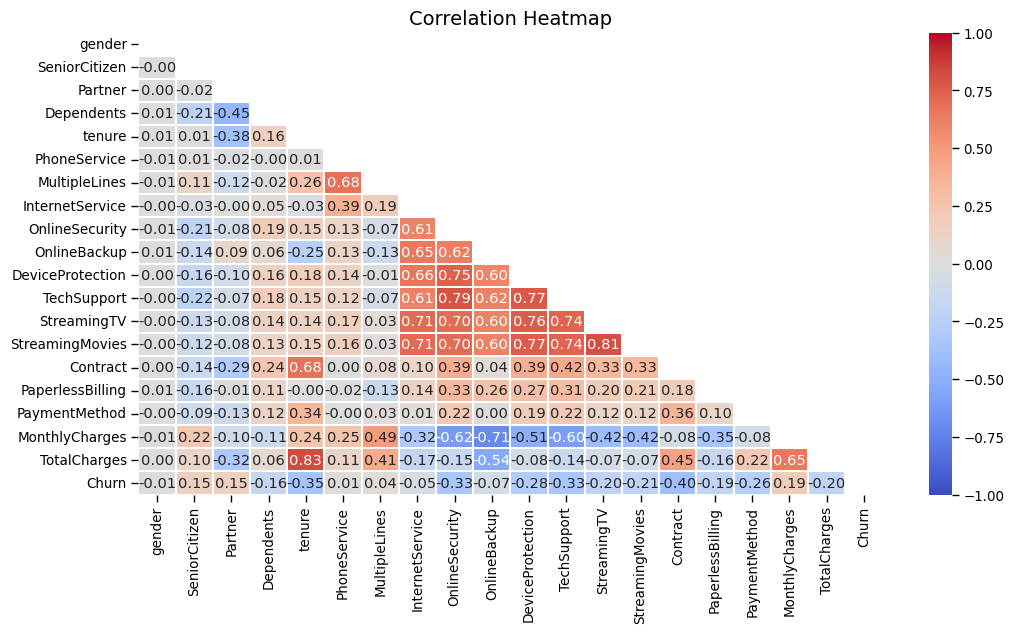

In [131]:

# Compute the correlation matrix with factorized categorical data
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()

# Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 6))  # Reduced size for better readability
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Heatmap", fontsize=14)

# Show plot
plt.show()


<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;">Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

In [132]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({'No': 0, 'Yes': 1})

In [133]:
#  Encode Binary Columns
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
    
for col in binary_cols:
        df[col] = df[col].map({"No" : 0, "Yes" : 1, "Male" : 0, "Female" : 1})

In [134]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1}) # Encoding Target Variable

In [135]:
#  One-Hot Encode Multi-category Columns
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [136]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn                                    1.000000
InternetService_Fiber optic              0.307612
PaymentMethod_Electronic check           0.301079
MonthlyCharges                           0.194008
PaperlessBilling                         0.190518
SeniorCitizen                            0.151270
StreamingTV_Yes                          0.065058
StreamingMovies_Yes                      0.062670
MultipleLines_Yes                        0.041888
PhoneService                             0.011072
gender                                   0.008694
MultipleLines_No phone service          -0.011072
DeviceProtection_Yes                    -0.064978
OnlineBackup_Yes                        -0.081145
PaymentMethod_Mailed check              -0.091649
PaymentMethod_Credit card (automatic)   -0.134052
Partner                                 -0.148670
Dependents                              -0.162366
TechSupport_Yes                         -0.163980
OnlineSecurity_Yes                      -0.170565


<Figure size 1400x700 with 0 Axes>

# Train-Test Split 

In [137]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [139]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

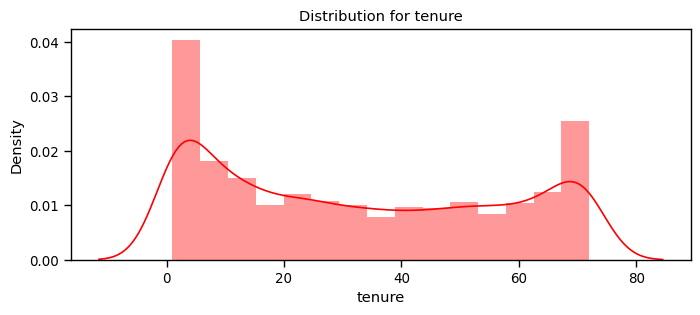

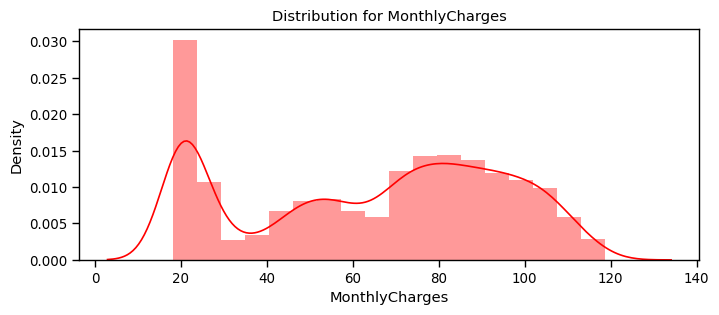

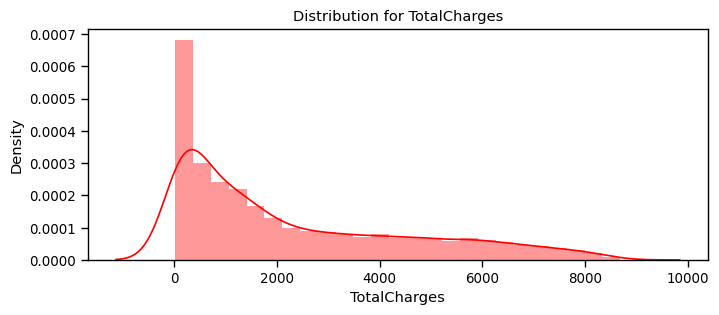

In [140]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

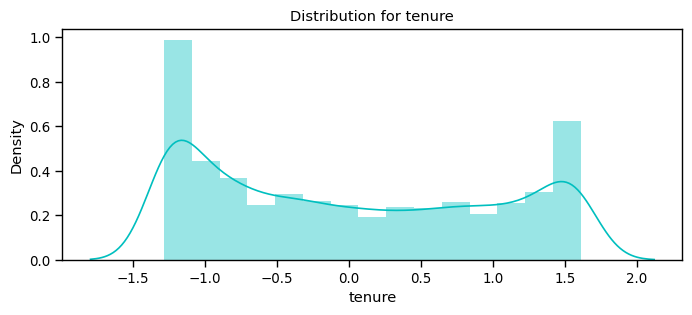

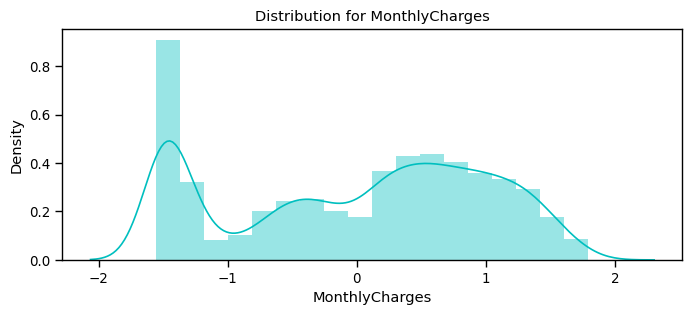

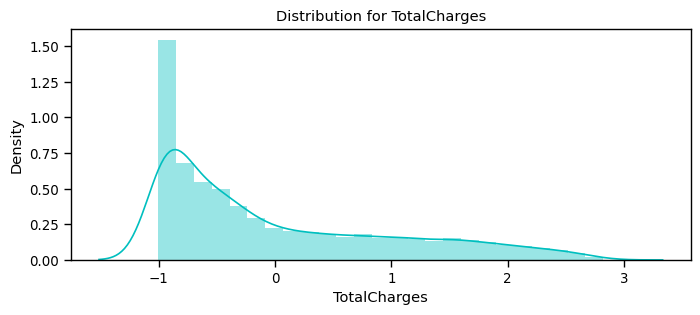

In [141]:

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]),
                      columns=num_cols)


for feat in num_cols:
    distplot(feat, df_std, color='c')


In [142]:
scaler= StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;">  Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "Naive Bayes" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "GradientBoost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LGB" : lgb.LGBMClassifier(verbosity=-1)
}

In [145]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [146]:
from IPython.display import display, Markdown

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    display(Markdown(f"### **{name}**"))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


### **Logistic Regression**

Confusion matrix:
 [[1375  171]
 [ 235  322]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1546
           1       0.65      0.58      0.61       557

    accuracy                           0.81      2103
   macro avg       0.75      0.73      0.74      2103
weighted avg       0.80      0.81      0.80      2103

--------------------------------------------------


### **Support Vector Machine**

Confusion matrix:
 [[1406  140]
 [ 257  300]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1546
           1       0.68      0.54      0.60       557

    accuracy                           0.81      2103
   macro avg       0.76      0.72      0.74      2103
weighted avg       0.80      0.81      0.80      2103

--------------------------------------------------


### **Naive Bayes**

Confusion matrix:
 [[819 727]
 [ 58 499]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.53      0.68      1546
           1       0.41      0.90      0.56       557

    accuracy                           0.63      2103
   macro avg       0.67      0.71      0.62      2103
weighted avg       0.79      0.63      0.65      2103

--------------------------------------------------


### **KNN**

Confusion matrix:
 [[1286  260]
 [ 259  298]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1546
           1       0.53      0.54      0.53       557

    accuracy                           0.75      2103
   macro avg       0.68      0.68      0.68      2103
weighted avg       0.75      0.75      0.75      2103

--------------------------------------------------


### **Decision Tree**

Confusion matrix:
 [[1244  302]
 [ 272  285]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1546
           1       0.49      0.51      0.50       557

    accuracy                           0.73      2103
   macro avg       0.65      0.66      0.66      2103
weighted avg       0.73      0.73      0.73      2103

--------------------------------------------------


### **Random Forest**

Confusion matrix:
 [[1370  176]
 [ 278  279]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1546
           1       0.61      0.50      0.55       557

    accuracy                           0.78      2103
   macro avg       0.72      0.69      0.70      2103
weighted avg       0.77      0.78      0.78      2103

--------------------------------------------------


### **AdaBoost**

Confusion matrix:
 [[1403  143]
 [ 270  287]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1546
           1       0.67      0.52      0.58       557

    accuracy                           0.80      2103
   macro avg       0.75      0.71      0.73      2103
weighted avg       0.79      0.80      0.79      2103

--------------------------------------------------


### **GradientBoost**

Confusion matrix:
 [[1382  164]
 [ 249  308]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1546
           1       0.65      0.55      0.60       557

    accuracy                           0.80      2103
   macro avg       0.75      0.72      0.73      2103
weighted avg       0.80      0.80      0.80      2103

--------------------------------------------------


### **XGB**

Confusion matrix:
 [[1343  203]
 [ 255  302]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1546
           1       0.60      0.54      0.57       557

    accuracy                           0.78      2103
   macro avg       0.72      0.71      0.71      2103
weighted avg       0.78      0.78      0.78      2103

--------------------------------------------------


### **LGB**

Confusion matrix:
 [[1353  193]
 [ 237  320]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1546
           1       0.62      0.57      0.60       557

    accuracy                           0.80      2103
   macro avg       0.74      0.72      0.73      2103
weighted avg       0.79      0.80      0.79      2103

--------------------------------------------------


In [147]:
# Model performance comparison table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps["classifier"], "predict_proba") else None
    
    results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
                })
            
    results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
    results_df.reset_index(drop=True, inplace=True)

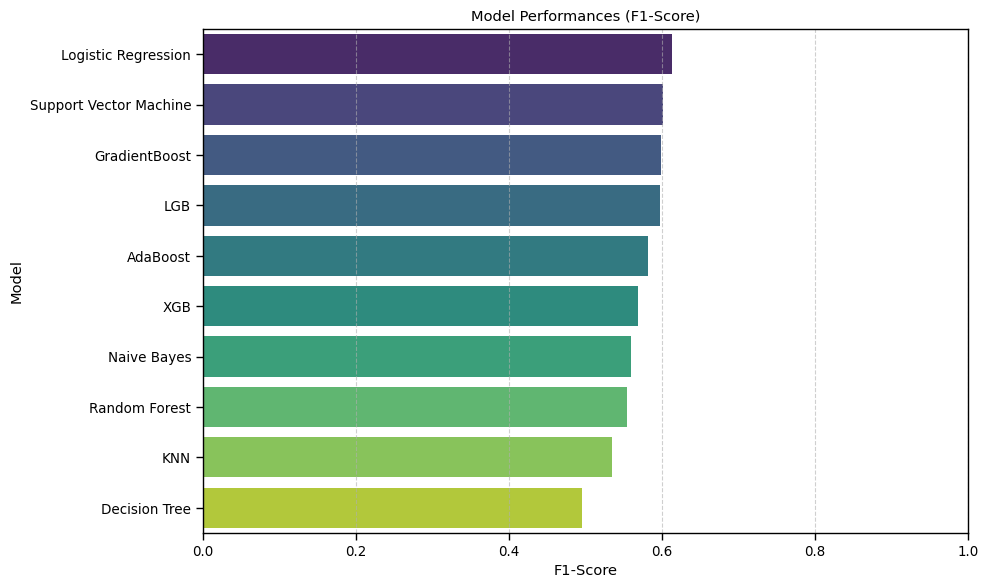

In [148]:

sorted_df = results_df.sort_values(by="F1-Score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x="F1-Score", y="Model", palette="viridis")

plt.title("Model Performances (F1-Score)")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [149]:
from sklearn.model_selection import GridSearchCV

# Pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=5000))
])
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear", "saga"]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'PaperlessBilling',
                                                                          'MultipleLines_No '
                                                                          'phone '
                                                                          'service',
                                                                          'MultipleLines_Yes',
                                                                          'Inte...
                                                                          'Contract_One '
                                                                          'year',
                                                                          'Contract_Two '
                                                                          'year',
                                                                          'PaymentMethod_Credit '
                                                                          'card '
                                                                          '(automatic)',
                                                                          'PaymentMethod_Electronic '
                                                                          'check',
                                                                          'PaymentMethod_Mailed '
                                                                          'check'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [150]:
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best F1 score: 0.594096077340361


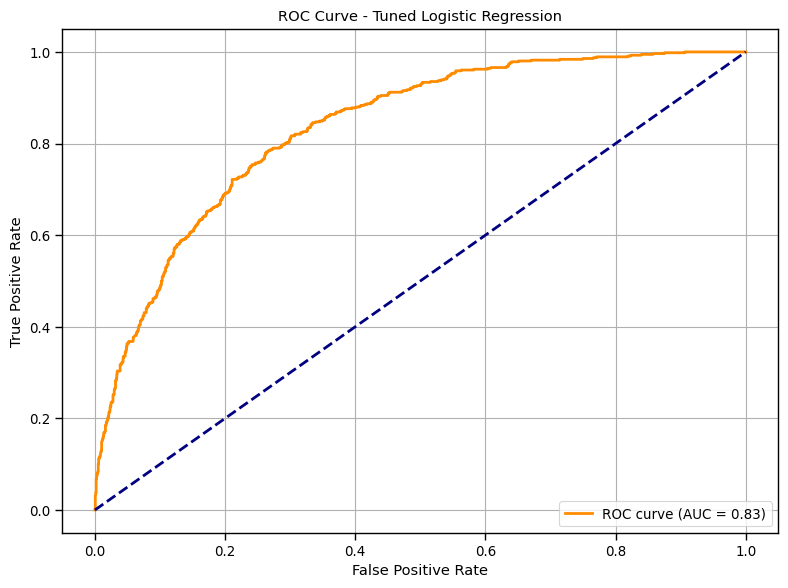

In [151]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [152]:
logreg = grid_search.best_estimator_.named_steps["classifier"]

feature_names = grid_search.best_estimator_.named_steps["preprocessing"].get_feature_names_out()

coefficients = logreg.coef_[0]

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Abs_Coeff": np.abs(coefficients)
}).sort_values(by="Abs_Coeff", ascending=False)

importance_df.drop("Abs_Coeff", axis=1).head(15)


,Feature,Coefficient
0,num__tenure,-1.371906
50,cat__Contract_Two year_True,-0.763409
2,num__TotalCharges,0.682495
19,cat__InternetService_Fiber optic_False,-0.602969
49,cat__Contract_Two year_False,0.598632
20,cat__InternetService_Fiber optic_True,0.438192
48,cat__Contract_One year_True,-0.423534
1,num__MonthlyCharges,-0.312948
45,cat__StreamingMovies_Yes_False,-0.270477
13,cat__PaperlessBilling_0,-0.259203
